# Lesson 03
# Aeden Jameson

## Best Practices for Assignments & Milestones

- <b>Break the assignment into sections - one section per numbered requirement.</b> Each assignment has numbered requirements/instructions e.g. "1. Read the CIFAR-10 dataset". Each requirement should have at least one markdown cell and at least one code cell. Feel free to combine sections or make other sensible changes if that makes sense for your code and is still clear. The intent is to give you a useful structure and to make sure you get full credit for your work.

- <b>Break the milestone into sections - one section for each item in the rubric.</b> Each milestone has rubric items e.g. "5. Handle class imbalance problem". Each rubric item should have at least one markdown cell and at least one code cell. Feel free to combine sections or make other sensible changes if that makes sense for your code and is still clear. The intent is to give you a useful structure and to make sure you get full credit for your work.

- <b>Include comments, with block comments preferred over in-line comments.</b> A good habit is to start each code cell with comments.

The above put into a useful pattern:

<b>Markdown cell:</b> Requirement #1: Read the CIFAR-10 dataset<br>
<b>Code cell:</b>: Comments followed by code<br>
<b>Markdown cell:</b> Requirement #2: Explore the data<br>
<b>Code cell:</b>: Comments followed by code<br>
<b>Markdown cell:</b> Requirement #3: Preprocess the data and prepare for classification<br>
<b>Code cell:</b>: Comments followed by code<br>

For more information:
- A good notebook example: [DataFrame Basics](https://github.com/Tanu-N-Prabhu/Python/blob/master/Pandas/Pandas_DataFrame.ipynb) 
- More example notebooks: [A gallery of interesting Jupyter Notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#pandas-for-data-analysis)
- [PEP 8 on commenting](https://www.python.org/dev/peps/pep-0008/)
- [PEP 257 - docstrings](https://www.python.org/dev/peps/pep-0257/)

Occasionally an assignment or milestone will ask you to do something other than write Python code e.g. ask you turn in a .docx file. In which case, please use logical structuring, but the specific notes above may not apply.

## Step 1: Read & Explore the Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from pandas.plotting import scatter_matrix
import scipy.stats as ss

#### Load & Prepare Data

In [30]:
def prepare(fileName = "https://library.startlearninglabs.uw.edu/DATASCI420/2019/Datasets/SuperstoreTransaction.csv"):
    data = pd.read_csv(fileName)
    
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])
    data['Country'] = data['Country'].astype('category')
    data['Ship Mode'] = data['Ship Mode'].astype('category')
    data['Category'] = data['Category'].astype('category')
    data['Sub-Category'] = data['Sub-Category'].astype('category')


    return data

transactions = prepare()
print('Downloaded...')

Downloaded...


In [41]:
transactions.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [27]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Row ID         9994 non-null   int64   
 1   Order ID       9994 non-null   object  
 2   Order Date     9994 non-null   object  
 3   Ship Date      9994 non-null   object  
 4   Ship Mode      9994 non-null   category
 5   Customer ID    9994 non-null   object  
 6   Customer Name  9994 non-null   object  
 7   Segment        9994 non-null   object  
 8   Country        9994 non-null   category
 9   City           9994 non-null   object  
 10  State          9994 non-null   object  
 11  Postal Code    9994 non-null   int64   
 12  Region         9994 non-null   object  
 13  Product ID     9994 non-null   object  
 14  Category       9994 non-null   category
 15  Sub-Category   9994 non-null   category
 16  Product Name   9994 non-null   object  
 17  Sales          9994 non-null   fl

In [115]:
transactions.head(15)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [19]:
transactions.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Step 2: Calculate the Recency, Frequency, Monitory for each customer

First we'll aggregate the data to the daily spend of each customer per day.

In [152]:
cust_agg = transactions.groupby(['Customer ID', 'Order Date']).agg({'Sales': 'sum'})
cust_agg = cust_agg.reset_index()
cust_agg.head()

,Customer ID,Order Date,Sales
0,AA-10315,2014-03-31,726.548
1,AA-10315,2014-09-15,29.500
2,AA-10315,2015-10-04,26.960
3,AA-10315,2016-03-03,4406.072
4,AA-10315,2017-06-29,374.480


In [156]:
roll_sum = cust_agg.groupby('Customer ID').rolling(window = '180D', on = 'Order Date')['Sales'].sum()
roll_cnt = cust_agg.groupby('Customer ID').rolling(window = '180D', on = 'Order Date')['Sales'].count()
roll_min = cust_agg.groupby('Customer ID')['Order Date'].diff(periods = 1)

In [159]:
churn_roll = pd.concat([roll_sum, roll_cnt], axis = 1)
churn_roll.columns = ['rolling_sales_180D', 'rolling_freq_180D']
churn_roll = churn_roll.reset_index()
churn_roll['last_visit_ndays'] = roll_min.fillna(pd.Timedelta('180 days'))

In [160]:
churn_all = cust_agg.merge(churn_roll, how = "inner", on = ['Customer ID', 'Order Date'], 
                            validate = 'one_to_one')
churn_all.head(20)

,Customer ID,Order Date,Sales,rolling_sales_180D,rolling_freq_180D,last_visit_ndays
0,AA-10315,2014-03-31,726.548,726.548,1.0,180 days
1,AA-10315,2014-09-15,29.500,756.048,2.0,168 days
2,AA-10315,2015-10-04,26.960,26.960,1.0,384 days
3,AA-10315,2016-03-03,4406.072,4433.032,2.0,151 days
4,AA-10315,2017-06-29,374.480,374.480,1.0,483 days
5,AA-10375,2014-04-21,16.520,16.520,1.0,180 days
6,AA-10375,2014-10-24,34.272,34.272,1.0,186 days
7,AA-10375,2015-02-03,178.370,212.642,2.0,102 days
8,AA-10375,2015-05-08,5.248,183.618,2.0,94 days
9,AA-10375,2015-11-13,84.960,84.960,1.0,189 days


## Step 3: Using K-means algorithm, perform customer segmentation

In [ ]:
Setup the RFM dataset we will perform K-Means on.

In [166]:
NOW = transactions['Order Date'].max()

kdata_agg = transactions.groupby(['Customer ID']).agg({'Order Date':lambda x:(NOW - x.max()).days,
                                                       'Order ID': lambda x: len(x),
                                                       'Sales': 'sum'})

kdata_agg['Order Date'] = kdata_agg['Order Date'].astype(int)
kdata_agg.rename(columns={'Order Date': 'recency', 
                         'Order ID': 'frequency', 
                         'Sales': 'total sales'}, inplace=True)

kdata_agg.head()

,recency,frequency,total sales
Customer ID,,,
AA-10315,184,11,5563.560
AA-10375,19,15,1056.390
AA-10480,259,12,1790.512
AA-10645,55,18,5086.935
AB-10015,415,6,886.156


#### Scale & Plot 

In [169]:
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler().fit_transform(kdata_agg)

[[ 0.19988856 -0.25691161  1.01511197]
 [-0.68676201  0.38425569 -0.70059002]
 [ 0.60291154 -0.09661979 -0.4211387 ]
 ...
 [-0.74049841 -0.09661979  1.45549211]
 [-0.49868462  2.9489249   1.9523543 ]
 [ 0.29661407 -0.57749527 -0.53403045]]


Let's plot the scaled RFM data to see if we can't get a sense of the groups

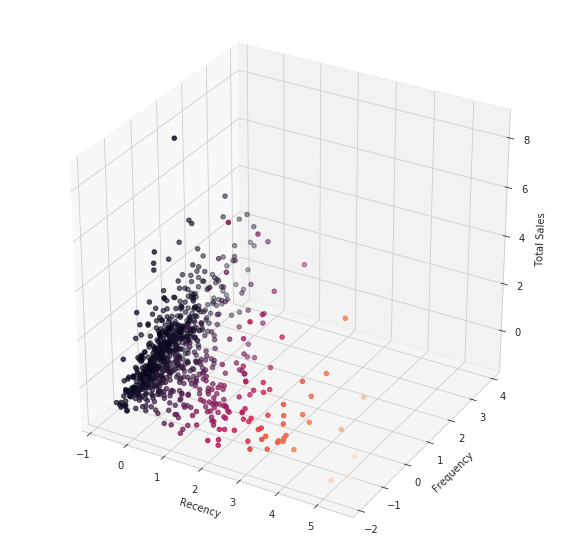

#### Elbow Method

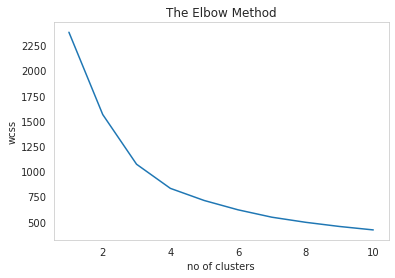

In [178]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

The last elbow comes at k=4

#### Perform K-Means

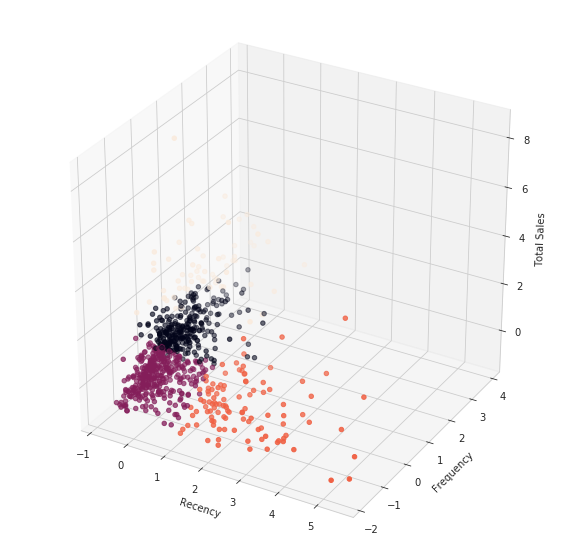

In [200]:
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(scaled_data)

centroids = kmeansmodel.cluster_centers_


from mpl_toolkits.mplot3d import Axes3D

sns.set_style("whitegrid", {'axes.grid' : False})
fig =plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') # Method 2

ax.scatter(scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2], c=y_kmeans, marker='o')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Total Sales')

plt.show()

## Step 4: Describe your results

In [ ]:
Cluster 1 (Ligh Grey) -> High sales and frequent
cluster 2 (Magenta Colr) -> average sales fairly frequent
cluster 3 (Orange Color) -> Low sales and not very often - EMAIL THEM!
cluster 4 (Black Color) -> average sales semi-frequently

